## Import all the libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error

## Read the dataset

In [ ]:
data= pd.read_csv('housing.csv')

## View the dimensions of the dataset

In [ ]:
data.shape

(20640, 10)

In [ ]:
data.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


## Plot histogram for the target variable

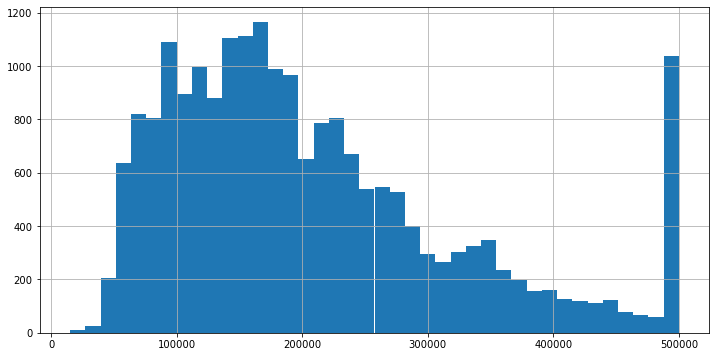

In [ ]:
data.median_house_value.hist(bins=40, figsize=(12,6))
plt.show()

## Rearrange the columns

In [ ]:
data= data[['longitude','latitude','housing_median_age','total_rooms', 'total_bedrooms','population','households',
            'median_income','ocean_proximity', 'median_house_value']]

In [ ]:
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0


## Extract the numeric features

In [ ]:
numeric_features= data.select_dtypes(include= ['int64', 'float64'])
numeric_features.shape

(20640, 9)

## Extract the categorical features

In [ ]:
categorical_features= data.select_dtypes(include= ['object'])
categorical_features.shape

(20640, 1)

## View the data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Check for missing values

In [ ]:
for col in data:
    missing_values= data[col].isna().sum()
    if(missing_values>0):
        print('{} {}'.format(col, missing_values))

total_bedrooms 207


## Impute missing values for numeric features

In [ ]:
impute_it = IterativeImputer()
numeric_cols_names= numeric_features.columns.tolist()
numeric_features= impute_it.fit_transform(numeric_features)
numeric_features= pd.DataFrame(numeric_features)
numeric_features.columns= numeric_cols_names
data[numeric_features.columns]= numeric_features

In [ ]:
data.total_bedrooms.isna().sum()

0

In [ ]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


## Plot correlation among the variables

In [ ]:
corr_among_variables= data.corr()

In [ ]:
corr_among_variables['median_house_value'].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.050590
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

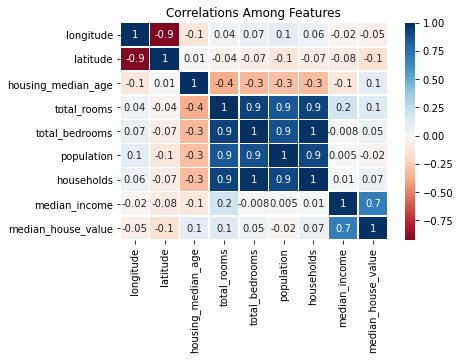

In [ ]:
sns.heatmap(data.corr(),annot=True, cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=0.5, 
            linecolor='white',
            fmt='.0001g',
            center = 0,
            square=False)

plt.title("Correlations Among Features");

## One-hot encode the categorical feature

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
one_hot_encoder.fit_transform(categorical_features)

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
categorical_features= pd.DataFrame(one_hot_encoder.fit_transform(categorical_features))
categorical_features.columns= one_hot_encoder.get_feature_names()
categorical_features.columns= ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [ ]:
categorical_features

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


## Transformed dataset with no missing values and one-hot enecoded categorical feature

In [ ]:
data_transformed= pd.concat([numeric_features, categorical_features], axis=1)

In [ ]:
data_transformed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,0.00,0.00,0.00,1.00,0.00
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,0.00,0.00,0.00,1.00,0.00
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,0.00,0.00,0.00,1.00,0.00
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,0.00,0.00,0.00,1.00,0.00
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,0.00,1.00,0.00,0.00,0.00
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,0.00,1.00,0.00,0.00,0.00
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,0.00,1.00,0.00,0.00,0.00
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,0.00,1.00,0.00,0.00,0.00


## Separating into Features & Target Variable

In [ ]:
X= data_transformed.drop('median_house_value', axis=1)
y= data_transformed['median_house_value']

In [ ]:
X.shape, y.shape

((20640, 13), (20640,))

## Splitting into Training & Testing Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Fitting the Regression Model

In [ ]:
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.options.display.float_format = '{:.2f}'.format

## The Intercept Value

In [ ]:
print('Intercept:\n', lin_reg.intercept_)

Intercept:
 -2288074.0204973067


## Weight Coefficients

In [ ]:
coeffs= pd.DataFrame(lin_reg.coef_)
coeffs.index=X.columns.tolist()
coeffs.columns= ['Weight']
coeffs

,Weight
longitude,-27347.72
latitude,-26158.15
housing_median_age,1069.46
total_rooms,-5.45
total_bedrooms,94.85
population,-42.74
households,61.56
median_income,39145.27
<1H OCEAN,-19668.61
INLAND,-57548.19


## Bar plot to visualize the importance/weight of coefficients

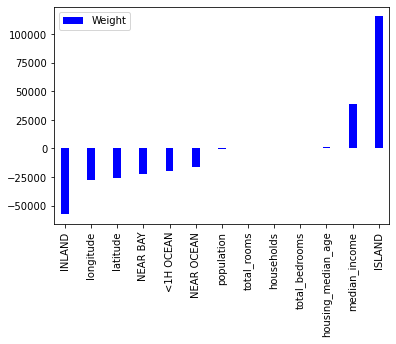

In [ ]:
coeffs.sort_values('Weight').plot.bar( rot=90, color="blue", width=0.3)

## Making the predictions

In [ ]:
predictions= lin_reg.predict(X_test)

## Evaluation Metrics

In [ ]:
MSE= mean_squared_error(y_test, predictions)
print('Mean_Squared_Error:', MSE )
RMSE= np.sqrt(MSE)
print('\n')
print('Root_Mean_Squared_Error:', RMSE )

Mean_Squared_Error: 4760724468.48417


Root_Mean_Squared_Error: 68998.0033659248


In [ ]:
r_sq= lin_reg.score(X_test, y_test)

0.6515693525248969

## Histogram of residuals

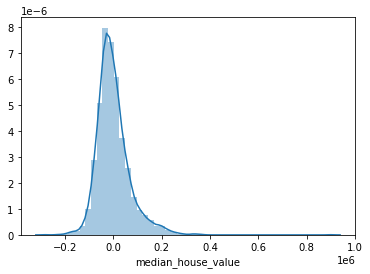

In [ ]:
sns.distplot((y_test-predictions),bins=50);

## Ridge Regression

In [ ]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train) 

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
predictions_ridge_reg= ridge_reg.predict(X_test)

MSE_ridge_reg= mean_squared_error(y_test, predictions_ridge_reg)
print('Mean_Squared_Error:', MSE_ridge_reg )
RMSE_ridge_reg= np.sqrt(MSE_ridge_reg)
print('\n')
print('Root_Mean_Squared_Error:', RMSE_ridge_reg )

Mean_Squared_Error: 4760851456.346095


Root_Mean_Squared_Error: 68998.92358831473


## Lasso Regression

In [ ]:
lasso_reg = Lasso(alpha=0.5, max_iter=10000)
lasso_reg.fit(X_train, y_train) 

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
predictions_lasso_reg= lasso_reg.predict(X_test)

MSE_lasso_reg= mean_squared_error(y_test, predictions_lasso_reg)
print('Mean_Squared_Error:', MSE_lasso_reg )

RMSE_lasso_reg= np.sqrt(MSE_lasso_reg)
print('\n')
print('Root_Mean_Squared_Error:', RMSE_ridge_reg )

Mean_Squared_Error: 4760826830.947481


Root_Mean_Squared_Error: 68998.92358831473
